In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
voice = pd.read_csv('voice.csv')
voice['label'] = np.where(voice['label'] == 'male', 1, 0) # male is 1 and female is 0


X = voice.drop('label', 1)
Y = voice['label']

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4171)

# Vanilla Logistic Regression
### Train

In [3]:
#Logistic Regression
vanilla_lr = LogisticRegression(C=.4*1e9, solver='liblinear', random_state=103) 
#random state for comparative purposes

# Fit the model.
vanilla_fit = vanilla_lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(vanilla_fit.coef_)
print('Intercept')
print(vanilla_fit.intercept_)
pred_y_vanilla = vanilla_lr.predict(X_train)

print('\n Accuracy')
print(pd.crosstab(pred_y_vanilla, y_train))

print('\n Percentage accuracy')
print(vanilla_lr.score(X_train, y_train))

print(' \n cross validation')
vanilla_cv = cross_val_score(vanilla_lr, X_train, y_train, cv=10)
print(vanilla_cv)
print('{:.4}% +/- {:.3}'.format(vanilla_cv.mean()*100, np.std(vanilla_cv)*200))

Coefficients
[[ 6.59914366e-01  6.95069648e+00 -5.89711251e+00 -1.91166160e+01
   2.18803057e+01  4.09969217e+01  1.57535398e-01 -9.14591643e-03
   2.87712729e+01 -9.76766240e+00  3.90995265e+00  6.59914366e-01
  -1.65821032e+02  3.60967491e+01 -3.96951726e+00  2.99451577e-01
  -5.95301362e-01 -3.22726043e-01  2.72575319e-01 -4.72040641e+00]]
Intercept
[-4.43851904]

 Accuracy
label     0     1
row_0            
0      1086    24
1        29  1078

 Percentage accuracy
0.9760938204781235
 
 cross validation
[0.97757848 0.98206278 0.96396396 0.98198198 0.96846847 0.97737557
 0.9638009  0.9638009  0.98190045 0.97285068]
97.34% +/- 1.49


### Test

In [4]:
pred_y_vanilla = vanilla_lr.predict(X_test)

print('\n Accuracy')
print(pd.crosstab(pred_y_vanilla, y_test))

print('\n Percentage accuracy')
print(vanilla_lr.score(X_test, y_test))

print(' \n cross validation')
vanilla_cv = cross_val_score(vanilla_lr, X_test, y_test, cv=10)
print(vanilla_cv)
print('{:.4}% +/- {:.3}'.format(vanilla_cv.mean()*100, np.std(vanilla_cv)*200))


 Accuracy
label    0    1
row_0          
0      454   12
1       15  470

 Percentage accuracy
0.9716088328075709
 
 cross validation
[0.97916667 0.96875    1.         0.94736842 0.97894737 0.95789474
 0.96842105 0.94736842 0.95789474 1.        ]
97.06% +/- 3.62


# Ridge Logistic Regression
### Train

In [5]:
ridge_lr = LogisticRegression(C=.4*1e9, penalty='l2', solver='liblinear', random_state=103)

# Fit the model.
ridge_fit = ridge_lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(ridge_fit.coef_)
print('Intercept')
print(ridge_fit.intercept_)
pred_y_ridge = ridge_lr.predict(X_train)

print('\n Accuracy')
print(pd.crosstab(pred_y_ridge, y_train))

print('\n Percentage accuracy')
print(ridge_lr.score(X_train, y_train))

print(' \n cross validation')
ridge_cv = cross_val_score(ridge_lr, X_train, y_train, cv=10)
print(ridge_cv)
print('{:.4}% +/- {:.3}'.format(ridge_cv.mean()*100, np.std(ridge_cv)*200))

Coefficients
[[ 8.08545079e-01  6.94523378e+00 -5.81822577e+00 -1.89418240e+01
   2.21231449e+01  4.10649688e+01  1.60366829e-01 -9.11879509e-03
   2.88179027e+01 -9.75607624e+00  4.00440053e+00  8.08545079e-01
  -1.66085480e+02  3.64193999e+01 -3.96843987e+00  2.48702518e-01
  -6.49410288e-01 -3.45520559e-01  3.03889729e-01 -4.34078291e+00]]
Intercept
[-4.69419682]

 Accuracy
label     0     1
row_0            
0      1085    24
1        30  1078

 Percentage accuracy
0.9756427604871448
 
 cross validation
[0.97757848 0.98206278 0.96396396 0.98198198 0.96846847 0.97737557
 0.96832579 0.9638009  0.98190045 0.97285068]
97.38% +/- 1.39


### Test

In [6]:
pred_y_ridge = ridge_lr.predict(X_test)

print('\n Accuracy')
print(pd.crosstab(pred_y_ridge, y_test))

print('\n Percentage accuracy')
print(ridge_lr.score(X_test, y_test))

print(' \n cross validation')
ridge_cv = cross_val_score(ridge_lr, X_test, y_test, cv=10)
print(ridge_cv)
print('{:.4}% +/- {:.3}'.format(ridge_cv.mean()*100, np.std(ridge_cv)*200))


 Accuracy
label    0    1
row_0          
0      455   12
1       14  470

 Percentage accuracy
0.9726603575184016
 
 cross validation
[0.97916667 0.96875    1.         0.94736842 0.97894737 0.95789474
 0.96842105 0.94736842 0.95789474 1.        ]
97.06% +/- 3.62


# Lasso Logisitc Regression
### Train

In [7]:
lasso_lr = LogisticRegression(C=.4*1e9, penalty='l1', solver='liblinear', random_state=103)

# Fit the model.
lasso_fit = lasso_lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(lasso_fit.coef_)
print('Intercept')
print(lasso_fit.intercept_)
pred_y_lasso = lasso_lr.predict(X_train)

print('\n Accuracy')
print(pd.crosstab(pred_y_lasso, y_train))

print('\n Percentage accuracy')
print(lasso_lr.score(X_train, y_train))

print(' \n cross validation')
lasso_cv = cross_val_score(lasso_lr, X_train, y_train, cv=10)
print(lasso_cv)
print('{:.4}% +/- {:.3}'.format(lasso_cv.mean()*100, np.std(lasso_cv)*200))

Coefficients
[[ 7.00920939e+00  1.52680454e+01 -8.15972010e+00 -7.61722967e+00
   5.53186433e+00  5.31803648e+01  7.48584982e-04 -5.92035254e-03
   1.33486149e+01 -7.05111784e+00  2.81143332e+00  6.90851759e+00
  -1.71597219e+02  4.27930739e+01 -2.95449656e+00  1.91542273e-01
  -7.84731463e-01  9.70617934e-03 -5.37585042e-02 -4.11739263e+00]]
Intercept
[7.88582315]

 Accuracy
label     0     1
row_0            
0      1090    24
1        25  1078

 Percentage accuracy
0.9778980604420388
 
 cross validation
[0.97757848 0.98206278 0.96396396 0.97297297 0.96846847 0.97737557
 0.97285068 0.96832579 0.98190045 0.97285068]
97.38% +/- 1.13


### Test

In [8]:
pred_y_lasso = lasso_lr.predict(X_test)

print('\n Accuracy')
print(pd.crosstab(pred_y_lasso, y_test))

print('\n Percentage accuracy')
print(lasso_lr.score(X_test, y_test))

print(' \n cross validation')
lasso_cv = cross_val_score(lasso_lr, X_test, y_test, cv=10)
print(lasso_cv)
print('{:.4}% +/- {:.3}'.format(lasso_cv.mean()*100, np.std(lasso_cv)*200))


 Accuracy
label    0    1
row_0          
0      456   13
1       13  469

 Percentage accuracy
0.9726603575184016
 
 cross validation
[0.97916667 0.96875    1.         0.93684211 0.97894737 0.95789474
 0.96842105 0.94736842 0.97894737 1.        ]
97.16% +/- 3.89


In [9]:
c = np.around(np.linspace(1, 1e9, 100))

vanilla_vals = []
lasso_vals = []
ridge_vals = []

for lambd in c:
    vanilla = LogisticRegression(C=lambd, solver='liblinear', random_state=103)
    vanilla.fit(X_train, y_train)
    r_square_vanilla = vanilla.score(X_test, y_test)
    vanilla_vals.append(r_square_vanilla)
    
    lasso = LogisticRegression(C=lambd, penalty='l1', solver='liblinear', random_state=103)
    lasso.fit(X_train, y_train)
    r_square_lasso = lasso.score(X_test, y_test)
    lasso_vals.append(r_square_lasso)
    
    ridge = LogisticRegression(C=lambd, penalty='l2', solver='liblinear', random_state=103)
    ridge.fit(X_train, y_train)
    r_square_ridge = ridge.score(X_test, y_test)
    ridge_vals.append(r_square_ridge)

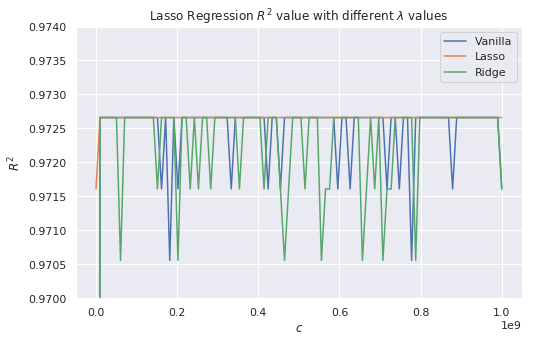

In [10]:
plt.figure(figsize=(8,5))
plt.plot(c, vanilla_vals, label='Vanilla')
plt.plot(c, lasso_vals, label='Lasso')
plt.plot(c, ridge_vals, label='Ridge')
plt.title('Lasso Regression $R^2$ value with different $\lambda$ values')
plt.xlabel('$c$')
plt.ylabel('$R^2$')
plt.ylim(.97, .974)
plt.legend()
plt.show()

\begin{array}{|c|c|c|c|} \hline
& \textbf{Vanilla} & \textbf{Ridge} & \textbf{Lasso} \\ \hline
\textbf{Train data} \\ \hline
\text{Confusion Matrix} &
\begin{bmatrix} 1087 & 24 \\ 28 & 1078  \\ \end{bmatrix} &
\begin{bmatrix} 1087 & 24 \\ 28 & 1078  \\ \end{bmatrix} &
\begin{bmatrix} 1090 & 24 \\ 25 & 1078  \\ \end{bmatrix} \\ \hline
\text{Accuracy: $R^2$} & 0.9765448804691024 & 0.9765448804691024 & 0.9778980604420388 \\ \hline
\text{10 fold Cross Validation mean: $R^2$}& 97.34 \pm 1.31 & 97.25 \pm  1.37 & 97.38 \pm  1.13 \\ \hline
\textbf{Test data} \\ \hline
\text{Confusion Matrix} &
\begin{bmatrix} 455 & 12 \\ 14 & 470  \\ \end{bmatrix} &
\begin{bmatrix} 455 & 12 \\ 14 & 470  \\ \end{bmatrix} &
\begin{bmatrix} 456 & 13 \\ 13 & 469  \\ \end{bmatrix} \\ \hline
\text{Accuracy: $R^2$} & 0.9726603575184016 & 0.9726603575184016 & 0.9726603575184016 \\\hline
\text{10 fold Cross Validation Mean: $R^2$} & 97.16\% \pm 3.4 & 96.85\% \pm 4.11 & 97.16\% \pm 3.89 \\ \hline
\end{array}

Here we can see that overall they did almost exactly the same. On the test set it looks as if Vanilla did ever so slightly better than Lasso in it's standard deviation being slightly less in the cross validation.

In the graphg above, you can see that with different C values, both Ridge and Vanilla are more variable, whereas Lasso rises to its max value quickly and stays there. Though, the variability is very small.

The model did well enough that I did not need to do any more feature selection than the features already in the dataset. 

Interesting to note that the lasso regression did not turn any coefficients to 0.